# Dissecting Spotify Valence

Spotify offers some metrics regarding each song, for instance danceability, instrumentalness, acousticness. Among them is also *valence*, which was introduced in 2014 by a company and counts the happiness of a song. 

The purpose of this analysis is to explore whether the other metrics contribute to te calculation of valence.

---

> Natalia Katsiapi <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8180040@aueb.gr

The first step is to import some needed libraries. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from plotnine import *

In [2]:
df = pd.read_csv("songs500_audio.csv")
df

,song_id,num_samples,duration,sample_md5,offset_seconds,window_seconds,analysis_sample_rate,analysis_channels,end_of_fade_in,start_of_fade_out,...,time_signature,time_signature_confidence,key,key_confidence,mode,mode_confidence,code_version,echoprint_version,synch_version,rhythm_version
0,6Q9NH5cNBY58nJkp5Jbs9j,3418911,155.05264,NaN,0,0,22050,1,0.00000,151.24316,...,5,0.718,1,0.300,1,0.506,3.15,4.12,1.0,1.0
1,0d1ujEcFwTqA4kWliTSJim,2923778,132.59764,NaN,0,0,22050,1,0.00000,130.11302,...,4,1.000,5,0.055,1,0.213,3.15,4.12,1.0,1.0
2,6myefhZIHsPCDloC1iu8KS,4616347,209.35814,NaN,0,0,22050,1,0.24984,203.06432,...,4,0.948,7,0.133,0,0.148,3.15,4.12,1.0,1.0
3,0xoUDiOLXqp9qB3S9FkvUI,7427910,336.86667,NaN,0,0,22050,1,0.21601,329.49115,...,4,0.978,1,0.568,1,0.408,3.15,4.12,1.0,1.0
4,7ks6AZmFcm3Y6PGGxGSmlB,4296222,194.84000,NaN,0,0,22050,1,2.11302,192.48181,...,4,1.000,3,0.010,1,0.262,3.15,4.12,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2a7Sqh8bpbabVWlY2jRET9,4055142,183.90668,NaN,0,0,22050,1,1.01583,170.08035,...,4,0.847,5,0.691,0,0.732,3.15,4.12,1.0,1.0
495,60lP1bVGsS0XytKQU4AnLa,3336312,151.30667,NaN,0,0,22050,1,0.52844,143.54576,...,4,0.974,6,0.370,1,0.425,3.15,4.12,1.0,1.0
496,1It1TxBK3xIQAB4xJkPevn,5522521,250.45447,NaN,0,0,22050,1,2.18268,246.91519,...,4,1.000,7,0.822,1,0.633,3.15,4.12,1.0,1.0
497,0yTGQpPOgcsS8Xqp5bQO58,2901489,131.58680,NaN,0,0,22050,1,4.02286,129.48608,...,4,1.000,1,0.972,1,0.668,3.15,4.12,1.0,1.0


Then, we load the data created in get_data.ipynb. They are in a different notebook, because we got songs from search results, which depend on the user's account. Thus, it is not guaranteed that the same file of songs will be created even if we add a seed in the process.

In [3]:
df = pd.read_csv("songs15000.csv")
df

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id_x,uri,track_href,analysis_url,duration_ms,time_signature,id_y,title,main_artist
0,5lAnYvAIkSDNXqfo7DyFUm,0.8550,0.4880,3.0,-4.601,1.0,0.2080,0.50600,0.000000,0.3470,...,audio_features,5lAnYvAIkSDNXqfo7DyFUm,spotify:track:5lAnYvAIkSDNXqfo7DyFUm,https://api.spotify.com/v1/tracks/5lAnYvAIkSDN...,https://api.spotify.com/v1/audio-analysis/5lAn...,174253.0,4.0,5lAnYvAIkSDNXqfo7DyFUm,Ain't Shit,Doja Cat
1,05Z4LAmmINEBnad0w5p8kl,0.7790,0.6750,11.0,-4.976,1.0,0.0485,0.13800,0.000000,0.1050,...,audio_features,05Z4LAmmINEBnad0w5p8kl,spotify:track:05Z4LAmmINEBnad0w5p8kl,https://api.spotify.com/v1/tracks/05Z4LAmmINEB...,https://api.spotify.com/v1/audio-analysis/05Z4...,230280.0,4.0,05Z4LAmmINEBnad0w5p8kl,Traicionera,Sebastian Yatra
2,6S8pntCfgqcPa5vhybICfv,0.5970,0.5020,4.0,-5.726,1.0,0.0723,0.25700,0.000000,0.1150,...,audio_features,6S8pntCfgqcPa5vhybICfv,spotify:track:6S8pntCfgqcPa5vhybICfv,https://api.spotify.com/v1/tracks/6S8pntCfgqcP...,https://api.spotify.com/v1/audio-analysis/6S8p...,161929.0,4.0,6S8pntCfgqcPa5vhybICfv,Sweet Dreams & Dynamite,Seeb
3,5zE8jYALzAISn0aO3BBAs7,0.7350,0.7640,0.0,-4.345,1.0,0.0769,0.62600,0.000157,0.1150,...,audio_features,5zE8jYALzAISn0aO3BBAs7,spotify:track:5zE8jYALzAISn0aO3BBAs7,https://api.spotify.com/v1/tracks/5zE8jYALzAIS...,https://api.spotify.com/v1/audio-analysis/5zE8...,260854.0,4.0,5zE8jYALzAISn0aO3BBAs7,Poď so mnou,I.M.T. Smile
4,4xhWfr0tyA7BGL7eXo8KnV,0.7850,0.3430,9.0,-10.923,0.0,0.0862,0.59300,0.000000,0.1030,...,audio_features,4xhWfr0tyA7BGL7eXo8KnV,spotify:track:4xhWfr0tyA7BGL7eXo8KnV,https://api.spotify.com/v1/tracks/4xhWfr0tyA7B...,https://api.spotify.com/v1/audio-analysis/4xhW...,121949.0,4.0,4xhWfr0tyA7BGL7eXo8KnV,ALL GIRLS ARE THE SAME,RØNIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15001,12zpU2S4lMdrK9dvsOoL1m,0.7110,0.9060,8.0,-2.671,1.0,0.0284,0.00952,0.000016,0.1530,...,audio_features,12zpU2S4lMdrK9dvsOoL1m,spotify:track:12zpU2S4lMdrK9dvsOoL1m,https://api.spotify.com/v1/tracks/12zpU2S4lMdr...,https://api.spotify.com/v1/audio-analysis/12zp...,157153.0,4.0,12zpU2S4lMdrK9dvsOoL1m,I Love It (feat. Charli XCX),Icona Pop
15002,78Gz2WwrhMZH4ke2IntuJR,0.0785,0.0345,10.0,-39.893,0.0,0.0503,0.28800,0.972000,0.1090,...,audio_features,78Gz2WwrhMZH4ke2IntuJR,spotify:track:78Gz2WwrhMZH4ke2IntuJR,https://api.spotify.com/v1/tracks/78Gz2WwrhMZH...,https://api.spotify.com/v1/audio-analysis/78Gz...,227855.0,4.0,78Gz2WwrhMZH4ke2IntuJR,Zunido Cósmico,Ruído Branco
15003,78ZqE2tjAxbqEGGlvGnQfT,0.2490,0.6600,0.0,-6.905,1.0,0.0342,0.50400,0.002600,0.0891,...,audio_features,78ZqE2tjAxbqEGGlvGnQfT,spotify:track:78ZqE2tjAxbqEGGlvGnQfT,https://api.spotify.com/v1/tracks/78ZqE2tjAxbq...,https://api.spotify.com/v1/audio-analysis/78Zq...,248947.0,4.0,78ZqE2tjAxbqEGGlvGnQfT,A Whiter Shade of Pale - Original Single Version,Procol Harum
15004,3R2Q1LmK9NNwwSihGD9tI7,0.7250,0.2400,5.0,-7.960,1.0,0.0313,0.74500,0.000000,0.1190,...,audio_features,3R2Q1LmK9NNwwSihGD9tI7,spotify:track:3R2Q1LmK9NNwwSihGD9tI7,https://api.spotify.com/v1/tracks/3R2Q1LmK9NNw...,https://api.spotify.com/v1/audio-analysis/3R2Q...,231755.0,4.0,3R2Q1LmK9NNwwSihGD9tI7,Budapest,Lasse Skriver


## Expore which Features Influence Valence (Regression)

We will keep only the needed columns.

In [4]:
song_metrics = pd.concat([df.loc[:, "danceability":"tempo"], df.loc[:, "duration_ms":"time_signature"]], axis=1)
song_metrics

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.8550,0.4880,3.0,-4.601,1.0,0.2080,0.50600,0.000000,0.3470,0.619,124.097,174253.0,4.0
1,0.7790,0.6750,11.0,-4.976,1.0,0.0485,0.13800,0.000000,0.1050,0.630,91.006,230280.0,4.0
2,0.5970,0.5020,4.0,-5.726,1.0,0.0723,0.25700,0.000000,0.1150,0.564,98.904,161929.0,4.0
3,0.7350,0.7640,0.0,-4.345,1.0,0.0769,0.62600,0.000157,0.1150,0.681,135.090,260854.0,4.0
4,0.7850,0.3430,9.0,-10.923,0.0,0.0862,0.59300,0.000000,0.1030,0.468,118.065,121949.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15001,0.7110,0.9060,8.0,-2.671,1.0,0.0284,0.00952,0.000016,0.1530,0.824,125.916,157153.0,4.0
15002,0.0785,0.0345,10.0,-39.893,0.0,0.0503,0.28800,0.972000,0.1090,0.398,174.000,227855.0,4.0
15003,0.2490,0.6600,0.0,-6.905,1.0,0.0342,0.50400,0.002600,0.0891,0.435,149.813,248947.0,4.0
15004,0.7250,0.2400,5.0,-7.960,1.0,0.0313,0.74500,0.000000,0.1190,0.299,112.904,231755.0,4.0


The variables that will be used for the analysis are the following:

In [5]:
song_metrics.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,1.499400e+04,14994.000000
mean,0.639940,0.619485,5.343671,-7.634577,0.586901,0.100163,0.301081,0.059366,0.175323,0.528482,120.493523,2.128186e+05,3.936241
std,0.168499,0.218334,3.605561,5.142912,0.492407,0.099444,0.297934,0.206381,0.140281,0.239994,30.604872,6.680176e+04,0.369143
min,0.000000,0.000020,0.000000,-46.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.966700e+04,0.000000
25%,0.544000,0.500000,2.000000,-8.438500,0.000000,0.038200,0.053700,0.000000,0.094700,0.344000,95.511750,1.776132e+05,4.000000
50%,0.670000,0.661000,6.000000,-6.251000,1.000000,0.056500,0.191000,0.000000,0.121000,0.536000,119.925500,2.074215e+05,4.000000
75%,0.763000,0.785000,9.000000,-4.780000,1.000000,0.118000,0.478000,0.000195,0.206750,0.720750,139.995000,2.394930e+05,4.000000
max,0.983000,1.000000,11.000000,3.169000,1.000000,0.947000,0.996000,1.000000,0.994000,0.982000,227.895000,1.965413e+06,5.000000


In [6]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [7]:
import itertools

def get_best_of_k(y, data, k):
    
    best_rsquared = 0
    best_model = None
    for comb in itertools.combinations(data.columns, k):
        regr = process_subset(y, data, comb)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr

    return best_model

In [8]:
def best_subset_selection(data, exog):
    best_model = None
    best_models = []
    y = data.loc[:, exog]
    endog = [ x for x in data.columns if x != exog ]
    X = data.loc[:, endog]

    for i in range(1, len(data.columns)):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model = get_best_of_k(y, X, i)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(model.model.data.xnames[1:]) # get the variables minums the intercept
        best_models.append(model)

    print(f'Fitted {2**len(data.columns)} models')
    return best_model, best_models

In [9]:
song_metrics.drop(song_metrics.loc[song_metrics.danceability.isna()].index, inplace=True)

In [10]:
best_model, _ = best_subset_selection(song_metrics, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'energy']
Finding the best model for 3 variables
['danceability', 'energy', 'acousticness']
Finding the best model for 4 variables
['danceability', 'energy', 'loudness', 'acousticness']
Finding the best model for 5 variables
['danceability', 'energy', 'loudness', 'acousticness', 'duration_ms']
Finding the best model for 6 variables
['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'duration_ms']
Finding the best model for 7 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'duration_ms']
Finding the best model for 8 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'duration_ms', 'time_signature']
Finding the best model for 9 variables
['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'tempo', 'duration_ms', 'time_signature']
Finding the best model for 10 vari

In [11]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     698.6
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:18:57   Log-Likelihood:                 3227.6
No. Observations:               14994   AIC:                            -6431.
Df Residuals:                   14982   BIC:                            -6340.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -0.3389      0.025    -13.830      0.000      -0.387      -0.291
danceability       0.6093      0.012     51.624      0.000       0.586       0.632
energy             0.6459      0.013     47.895      0.000       0.619       0.672
key                0.0010      0.000      2.235      0.025       0.000       0.002
loudness          -0.0099      0.001    -18.363      0.000      -0.011      -0.009
mode               0.0064      0.003      1.944      0.052    -5.3e-05       0.013
speechiness       -0.1501      0.017     -8.899      0.000      -0.183      -0.117
acousticness       0.1673      0.008     21.395      0.000       0.152       0.183
liveness           0.0171      0.012      1.467      0.142      -0.006       0.040
tempo              0.0005    5.4e-05      9.692      0.000       0.000       0.001
duration_ms    -2.586e-07   2.44e-08    -10.583      0.000   -3.06e-07   -2.11e-07
time_signature    -0.0136      0.005     -3.026      0.002      -0.022      -0.005
==============================================================================
Omnibus:                       54.610   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.108
Skew:                          -0.099   Prob(JB):                     2.17e-11
Kurtosis:                       2.801   Cond. No.                     3.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
best_model.model.exog_names.remove('intercept')
best_model.model.exog_names.remove('liveness')
best_model.model.exog_names

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'tempo',
 'duration_ms',
 'time_signature']

In [13]:
song_metrics.get(best_model.model.exog_names)

,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,duration_ms,time_signature
0,0.8550,0.4880,3.0,-4.601,1.0,0.2080,0.50600,124.097,174253.0,4.0
1,0.7790,0.6750,11.0,-4.976,1.0,0.0485,0.13800,91.006,230280.0,4.0
2,0.5970,0.5020,4.0,-5.726,1.0,0.0723,0.25700,98.904,161929.0,4.0
3,0.7350,0.7640,0.0,-4.345,1.0,0.0769,0.62600,135.090,260854.0,4.0
4,0.7850,0.3430,9.0,-10.923,0.0,0.0862,0.59300,118.065,121949.0,4.0
...,...,...,...,...,...,...,...,...,...,...
15001,0.7110,0.9060,8.0,-2.671,1.0,0.0284,0.00952,125.916,157153.0,4.0
15002,0.0785,0.0345,10.0,-39.893,0.0,0.0503,0.28800,174.000,227855.0,4.0
15003,0.2490,0.6600,0.0,-6.905,1.0,0.0342,0.50400,149.813,248947.0,4.0
15004,0.7250,0.2400,5.0,-7.960,1.0,0.0313,0.74500,112.904,231755.0,4.0


In [14]:
important_cols = [col for col in best_model.model.exog_names]
important_cols

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'tempo',
 'duration_ms',
 'time_signature']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(song_metrics.loc[:, important_cols].values, song_metrics['valence'].values, test_size=0.20)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error 
from math import sqrt

mae_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_absolute_error(y_test,pred) #calculate rmse
    mae_val.append(error) #store rmse values
    print('MAE value for k=' , K , 'is:', error)

MAE value for k= 1 is: 0.19946403467822607
MAE value for k= 2 is: 0.1859046448816272
MAE value for k= 3 is: 0.18579599977770367
MAE value for k= 4 is: 0.18412779426475492
MAE value for k= 5 is: 0.18423477492497498
MAE value for k= 6 is: 0.18505275869734356
MAE value for k= 7 is: 0.186705868146525
MAE value for k= 8 is: 0.18708807644214737
MAE value for k= 9 is: 0.18841147827053462
MAE value for k= 10 is: 0.18898694098032678
MAE value for k= 11 is: 0.1899403652732729
MAE value for k= 12 is: 0.1900849572079582
MAE value for k= 13 is: 0.19129550183394464
MAE value for k= 14 is: 0.19192673319677986
MAE value for k= 15 is: 0.192603207069023
MAE value for k= 16 is: 0.1930345356785595
MAE value for k= 17 is: 0.19357649863680051
MAE value for k= 18 is: 0.19464225871586827
MAE value for k= 19 is: 0.19494822853231777
MAE value for k= 20 is: 0.19548490096698898
MAE value for k= 21 is: 0.19575831737563318
MAE value for k= 22 is: 0.19615042620267364
MAE value for k= 23 is: 0.19635960059150154
MAE v

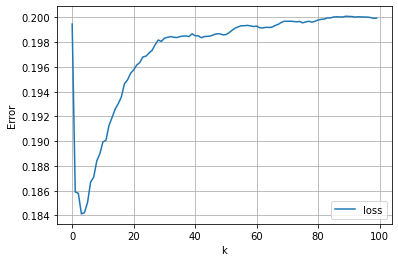

In [17]:
plt.plot(mae_val, label='loss')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [18]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor


parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(criterion='absolute_error'), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7)
{'max_depth': 7}


In [19]:
from sklearn import tree

song_tree = DecisionTreeRegressor(max_depth=clf.best_params_["max_depth"], criterion='absolute_error')

song_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7)

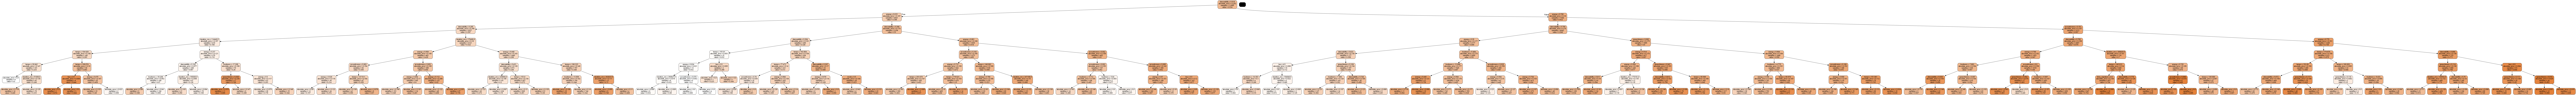

In [20]:
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(song_tree, out_file=dot_data,  
                     feature_names=important_cols,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

In [21]:
pred = song_tree.predict(X_test) 
error = mean_absolute_error(y_test, pred) 
error

0.15019393131043682

In [22]:
from sklearn.ensemble import BaggingRegressor
bagging_song_tree = BaggingRegressor(DecisionTreeRegressor(random_state=0), 
                                      n_estimators=50,
                                      n_jobs=-1)

bagging_song_tree.fit(X_train, 
                       y_train)

pred = bagging_song_tree.predict(X_test) #make prediction on test set
error = mean_absolute_error(y_test, pred) #calculate rmse
error

0.11922815941821877

In [23]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [24]:
pred = regr.predict(X_test) #make prediction on test set
error = mean_absolute_error(y_test, pred) #calculate rmse
error

0.15085798331871195

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
INPUT_SIZE = len(important_cols)


In [27]:
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
with np.printoptions(precision=2):
    print(normalizer.mean.numpy())
    print(normalizer.variance.numpy())
    print(normalizer.count.numpy())

[[ 6.39e-01  6.19e-01  5.36e+00 -7.66e+00  5.85e-01  1.01e-01  3.01e-01
   1.21e+02  2.13e+05  3.93e+00]]
[[2.85e-02 4.78e-02 1.30e+01 2.70e+01 2.43e-01 1.01e-02 8.88e-02 9.40e+02
  4.50e+09 1.41e-01]]
11995


In [28]:
from tensorflow.keras import layers

def build_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(INPUT_SIZE ** 2, activation='relu'),
        layers.Dense(INPUT_SIZE ** 2, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

model = build_compile_model()

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,322
Trainable params: 11,301
Non-trainable params: 21
_________________________________________________________________


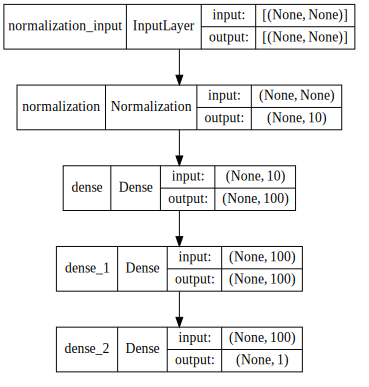

In [30]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [31]:
num_epochs = 100

history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/100
300/300 [==============================] - 5s 2ms/step - loss: 0.1730 - val_loss: 0.1598
Epoch 2/100
300/300 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1578
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1502 - val_loss: 0.1538
Epoch 4/100
300/300 [==============================] - 0s 2ms/step - loss: 0.1480 - val_loss: 0.1564
Epoch 5/100
300/300 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.1563
Epoch 6/100
300/300 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 0.1541
Epoch 7/100
300/300 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1479
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1424 - val_loss: 0.1496
Epoch 9/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1399 - val_loss: 0.1517
Epoch 10/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1400 - val_lo

In [32]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

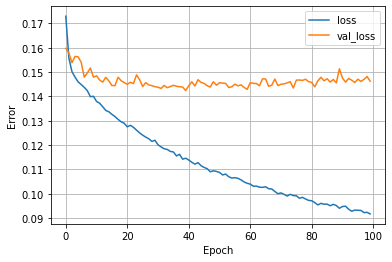

In [33]:
plot_loss(history)

In [34]:
model.evaluate(X_test, y_test, verbose=0)

0.14551205933094025

In [35]:
model_less_epochs = build_compile_model()

In [36]:
model_less_epochs.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 100)               1100      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,322
Trainable params: 11,301
Non-trainable params: 21
_________________________________________________________________


In [37]:
num_epochs = 39

history_less_epochs = model_less_epochs.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/39
300/300 [==============================] - 1s 3ms/step - loss: 0.1718 - val_loss: 0.1629
Epoch 2/39
300/300 [==============================] - 1s 2ms/step - loss: 0.1557 - val_loss: 0.1590
Epoch 3/39
300/300 [==============================] - 1s 2ms/step - loss: 0.1505 - val_loss: 0.1608
Epoch 4/39
300/300 [==============================] - 1s 2ms/step - loss: 0.1503 - val_loss: 0.1585
Epoch 5/39
300/300 [==============================] - 1s 2ms/step - loss: 0.1472 - val_loss: 0.1520
Epoch 6/39
300/300 [==============================] - 1s 2ms/step - loss: 0.1443 - val_loss: 0.1531
Epoch 7/39
300/300 [==============================] - 1s 2ms/step - loss: 0.1440 - val_loss: 0.1569
Epoch 8/39
300/300 [==============================] - 1s 2ms/step - loss: 0.1431 - val_loss: 0.1504
Epoch 9/39
300/300 [==============================] - 1s 2ms/step - loss: 0.1419 - val_loss: 0.1545
Epoch 10/39
300/300 [==============================] - 1s 2ms/step - loss: 0.1394 - val_loss: 0.1489

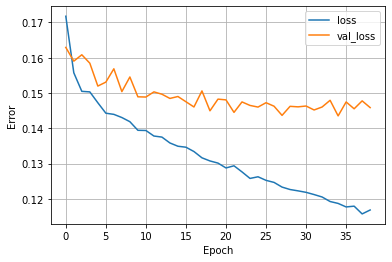

In [38]:
plot_loss(history_less_epochs)

In [39]:
model_less_epochs.evaluate(X_test, y_test, verbose=0)

0.14359834790229797

## Evaluating given test data

In [45]:
given_test = pd.read_csv("test_tracks.csv")
given_test

,Unnamed: 0,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
1,1,5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
2,2,0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
3,3,4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
4,4,5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1157,4lUmnwRybYH7mMzf16xB0y,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1158,1158,1fzf9Aad4y1RWrmwosAK5y,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
1159,1159,3E3pb3qH11iny6TFDJvsg5,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
1160,1160,3yTkoTuiKRGL2VAlQd7xsC,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


In [46]:
X_given_test = given_test.loc[:, important_cols].values
y_given_test = given_test['valence'].values

In [47]:
model_less_epochs.evaluate(X_given_test, y_given_test, verbose=0)

0.1352561116218567

In [48]:
pred = bagging_song_tree.predict(X_given_test) #make prediction on test set
error = mean_absolute_error(y_given_test, pred) #calculate rmse
error

0.09480315783132531